# Aprendizado de máquinas

Dados de series temporais assumem cada vez mais importancia com a era da internet das coisas (IoT), da digitalizacao de sistemas de hospitais e das cidades inteligentes. Podemos esperar que dados dessa forma crescam exponencialmente com mais qualidade, quantidade e revelencia. 
Por esse motivo, cria-se uma demanda para o estudo e analise de dados de series temporais.


# Motivação e Importância

As séries temporais são um campo fascinante e em constante evolução da análise de dados.

Ao estudar séries temporais, é possível explorar conceitos complexos, como autocorrelação, estacionariedade, sazonalidade e modelos preditivos. Além disso, há uma grande variedade de técnicas disponíveis para análise de séries temporais, como ARIMA, modelos de suavização exponencial, redes neurais, entre outros.

# Objetivos

O objetivo deste trabalho é entender e aplicar técnicas de análise e modelagem para prever comportamentos futuros de uma série temporal de interesse. Para isso, serão explorados conceitos como autocorrelação, estacionariedade, sazonalidade e modelos preditivos, a fim de obter uma compreensão mais profunda dos dados.

# Revisão Bibliografica

## Datasets

- https://archive-beta.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

## Tutoriais

- https://towardsdatascience.com/5-types-of-plots-that-will-help-you-with-time-series-analysis-b63747818705
- https://youtu.be/vV12dGe_Fho
- https://youtu.be/z3ZnOW-S550
- https://youtu.be/xi0vhXFPegw

## Artigos

- https://arxiv.org/pdf/2004.13408.pdf
- https://arxiv.org/pdf/2205.13504v3.pdf
- https://arxiv.org/abs/1907.09207
- https://www.degruyter.com/document/doi/10.1515/dema-2022-0176/html?lang=en

# Hipótese

Como esse dataset se comportará aplicando modelos de Deep Learning


# Prerequisitos

Extrair o .zip que se encontra dentro da pasta data.

! unzip data/household_power_consumption.zip -d data/

# Base de dados

Essa base de dados contem 2075259 medidas coletadas em uma casa na cidade de Sceaux (7km de Paris) entre Dezembro de 2006 e Novembro de 2010.

In [164]:
# general
import pandas as pd
import numpy as np

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 5]

# settings
color_pal = sns.color_palette()

In [165]:
FILE_PATH = 'data/household_power_consumption.txt'

df = pd.read_csv(FILE_PATH, delimiter=';', dtype=str)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [166]:
def join_date_and_time(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
    df = df.drop(['Time'], axis=1)
    return df

In [167]:
df = join_date_and_time(df)

In [168]:
df = df.set_index('Date')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


# Tratamento dos dados

In [169]:
def clean(df):
    df = df.copy()
    for col in df.columns:
        #df = df[~df[col].str.contains('?', regex=False)]
        df[col] = df[col].str.replace('?', 'nan', regex=False).astype(float)
        df = df.fillna(method='ffill')
    return df

In [170]:
df = clean(df)

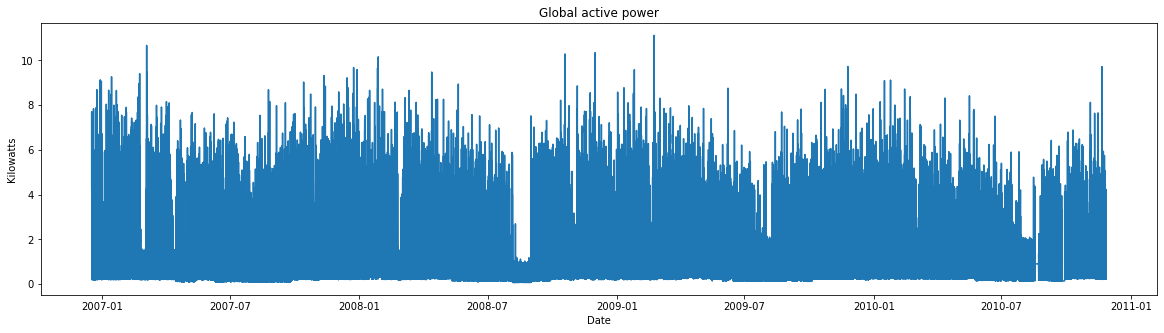

In [171]:
plt.title('Global active power')
plt.plot(df.index, df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Kilowatts')
plt.show()

Esse é um grafico de linha representando toda a base.

Como os dados sao coletados de minuto a minuto, esse gráfico parece ser de barra. Podemos ver as linhas se dermos um "zoom" nele.

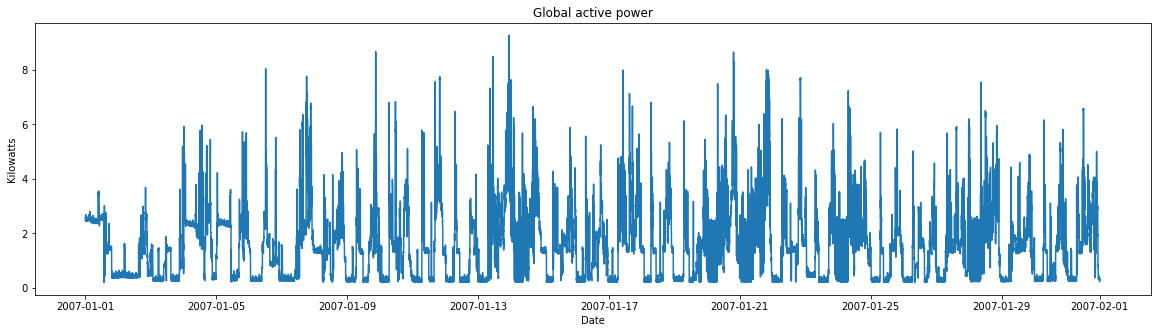

In [172]:
first_month_df = df.loc['2007-01-01':'2007-01-31']
plt.title('Global active power')
plt.plot(first_month_df.index, first_month_df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Kilowatts')
plt.show()

Aqui podemos ver as linhas

# Dados a serem analisados

Temos dados de Dezembro de 2006 (16/12/2006) até Novembro de 2010 (26/11/2010). 

Seguindo o exemplo de [1], os dados de 16/12/2006 até 31/12/2009 para treinamento e 01/01/2010 até 26/11/2010 para teste. Apenas para análise, sera usado os dados a partir de 2007

In [173]:
df = df.loc['2007-01-01':'2009-12-31']

In [174]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.57824e+06,1.57824e+06,1.57824e+06,1.57824e+06,1.57824e+06,1.57824e+06,1.57824e+06
mean,1.08575,0.122119,240.627,4.60926,1.15324,1.33811,6.1877
std,1.07907,0.111764,3.30644,4.53775,6.27236,5.95692,8.33012
min,0.076,0,223.2,0.2,0,0,0
25%,0.3,0.046,238.72,1.4,0,0,0
50%,0.558,0.1,240.84,2.4,0,0,1
75%,1.522,0.192,242.75,6.4,0,1,17
max,11.122,1.39,254.15,48.4,82,78,31


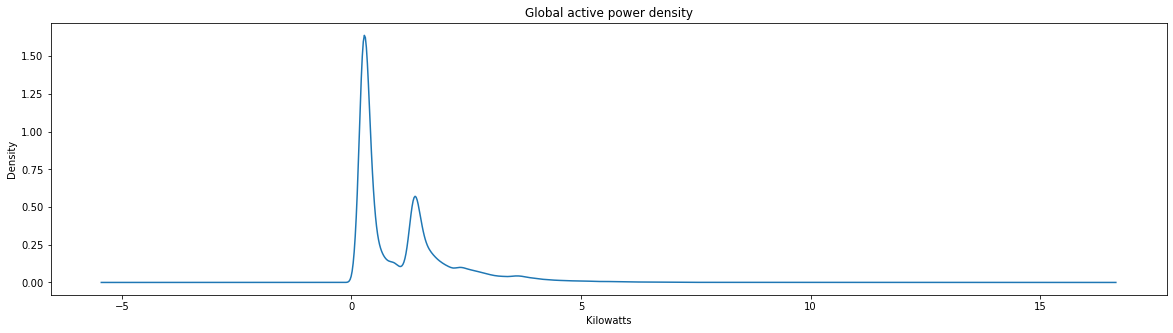

In [175]:
plt.title('Global active power density')
plt.ylabel('Value')
plt.xlabel('Kilowatts')
df['Global_active_power'].plot.kde()
plt.show()

Nesse gráfico podemos ver que os dados se encontram perto de 1. 

O gráfico de linha visto acima pode enganar o leitor já que os picos sao excessões.

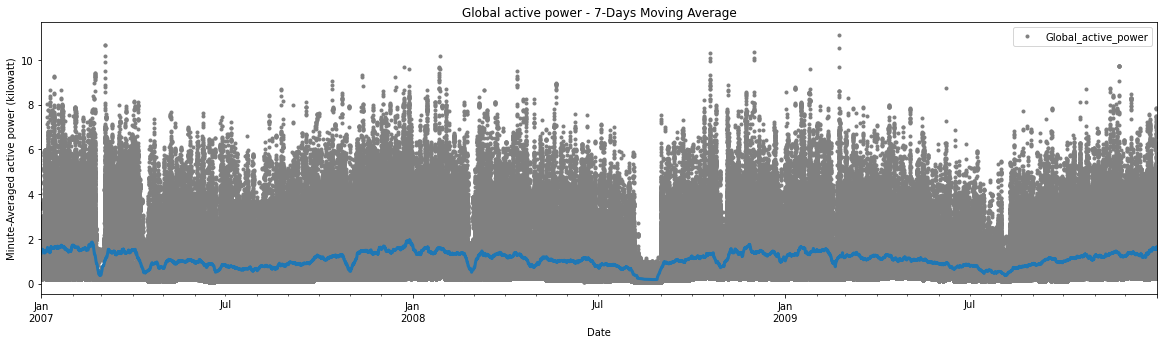

In [176]:
window = 24*60*7
df_gap = df[['Global_active_power']]

moving_average = df_gap.rolling(
    window=window,       # 7-day window
    center=True,
    min_periods=window//2,
).mean()

ax = df_gap.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Global active power - 7-Days Moving Average", legend=False, ylabel='Minute-Averaged active power (kilowatt)',
);

Esse é um grafico de média móvel de 7 dias. 

Aqui também percebemos que os dados se encontram mais em baixo. Além disso existem alguns outliers como o mes de março de 2007 e setembro de 2008. O gasto energético se mantem mais ou menos igual em todo o período

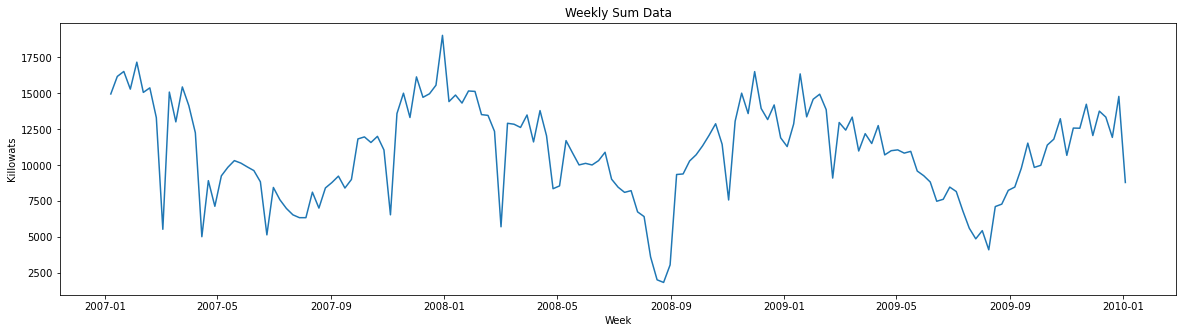

In [177]:
weekly_df = df.resample('W').sum()
weekly_df = weekly_df[['Global_active_power']]

plt.plot(weekly_df.index, weekly_df['Global_active_power'])
plt.xlabel('Week')
plt.ylabel('Killowats')
plt.title('Weekly Sum Data')
plt.show()

Esse é um gráfico com um downsampling semanal utilizando soma.

Já podemos pensar em algumas hipoteses sazionais que serão discutidas nas seções abaixo.

# Decomposição

A decomposição de séries temporais é uma técnica analítica usada para separar uma série temporal em seus componentes principais, incluindo tendência, sazonalidade e flutuações aleatórias.

Assumindo que a série é aditiva como [1], e com frequencia de 2 a 12.

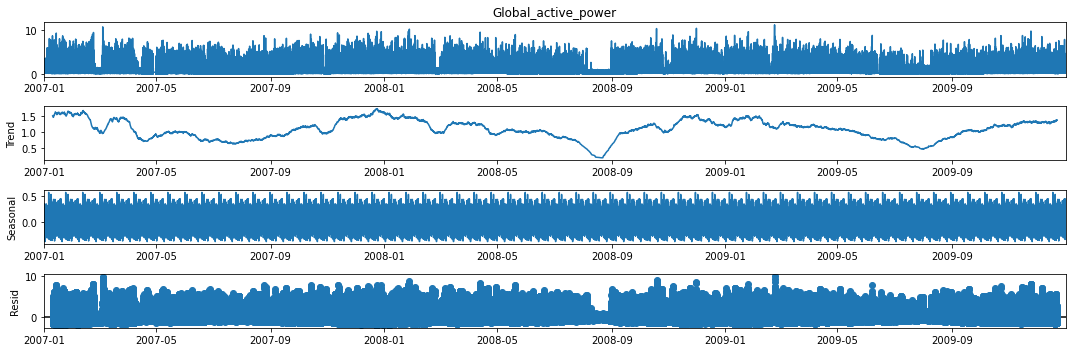

In [178]:
decomposition = seasonal_decompose(df['Global_active_power'], 
                                   model='additive',
                                   period=26298)
fig = decomposition.plot();
fig.set_size_inches((15, 5))
fig.tight_layout()
plt.show()

Aqui percebemos que a tendência é linear (???), não existe sazonalidade e existe bastante (???) aleátoriedade.

# Sazonalidade

Vamos analisar se existem relações de tempo nesses dados.

## Hipóteses

- Temos um padrão de horarios no gasto enérgetico? A madrugada se gasta menos do que a manhã ou a noite?
- Temos um padrão nos dias de semana? Os finais de semana se gasta mais energia do que os dias de semana?
- Temos um padrão nos meses? Meses do final do ano se gasta mais energia?
- Temos um padrão das estaçoes do ano? Estaçōes frias se gasta mais energia?

## Horas

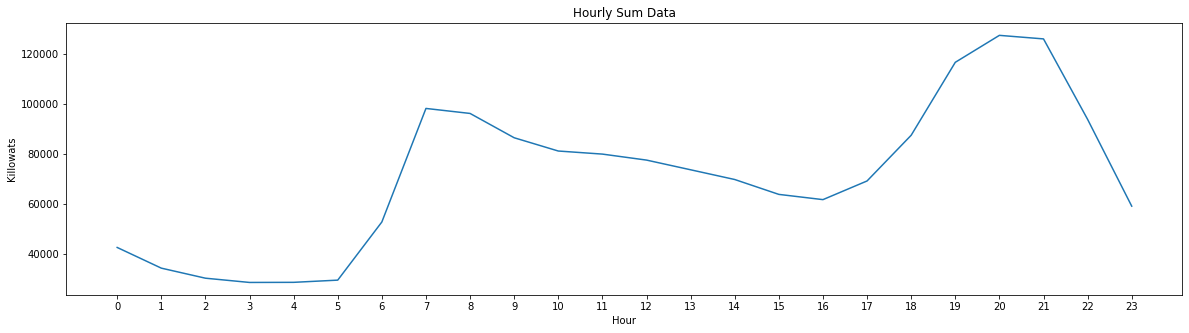

In [179]:
hourly_df = df.groupby(df.index.hour)['Global_active_power'].sum()

time = []
for x in range(0,24):
    time.append(x)
    
plt.plot(hourly_df.index, hourly_df)
plt.xticks(time)
plt.xlabel('Hour')
plt.ylabel('Killowats')
plt.title('Hourly Sum Data')
plt.show()

Como é de se esperar, a madrugada tem um gasto energetico menor, a manha tem um pico, seguido de outro pico a noite.

## Semana

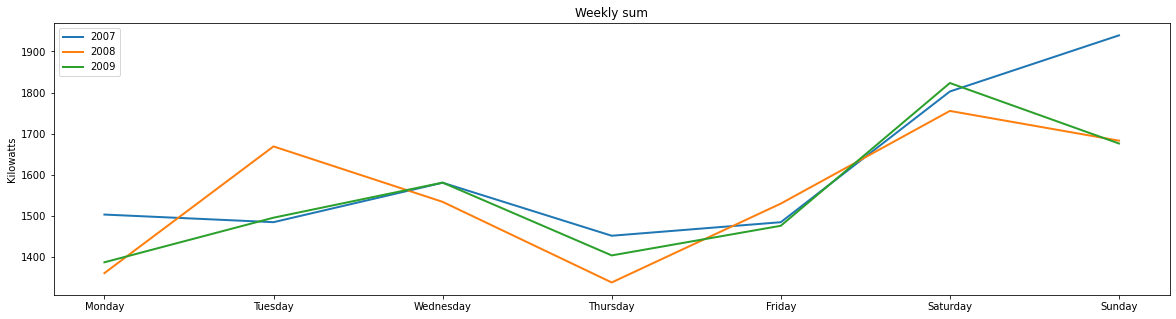

In [180]:
year_df = df.groupby(df.index.year)

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for name, group in year_df:
    weekday_index = pd.Index(weekday_names)
    
    weekday_groups = group.groupby(group.index.weekday).agg({'Global_active_power': ['sum']})
    weekday_groups.columns = weekday_groups.columns.droplevel(1)
    weekday_groups.index = weekday_index[weekday_groups.index]
    weekday_groups['Global_active_power'] = weekday_groups['Global_active_power'] / 52
    plt.ylabel('Kilowatts')
    plt.plot(weekday_groups, linewidth=2)

plt.legend(['2007', '2008', '2009'])
plt.title('Weekly sum')
plt.show()

Podemos ver que existe uma sazionalidade nos dias da semana sendo que no fim de semana se gasta mais energia.

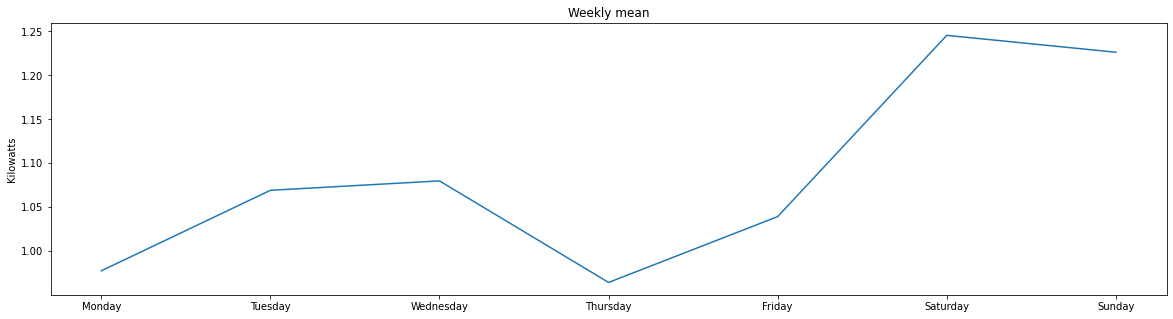

In [181]:
weekday_groups = df.groupby(df.index.weekday)

result = weekday_groups.mean()

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_index = pd.Index(weekday_names)

result.index = weekday_index[result.index]

plt.title('Weekly mean')
plt.ylabel('Kilowatts')
plt.plot(result.index, result['Global_active_power'])
plt.show()

## Mês

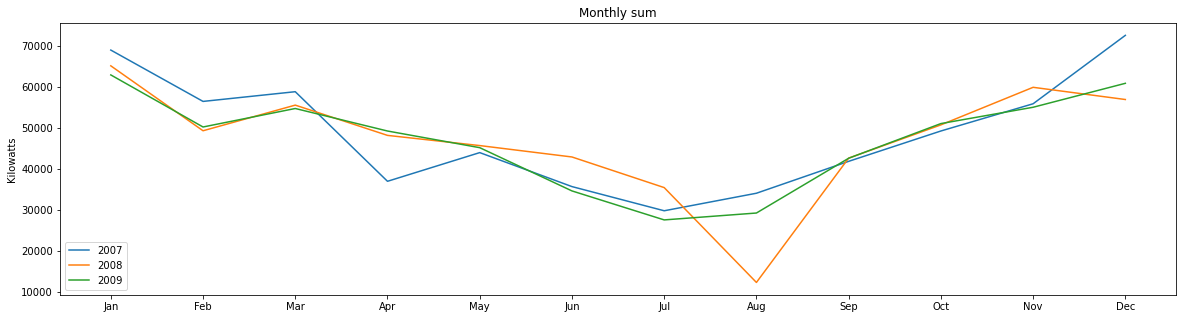

In [182]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

year_df = df.groupby(df.index.year)

for name, group in year_df:
    monthly_sum = group.groupby(pd.Grouper(freq='M'))['Global_active_power'].sum()
    month_index = pd.Index(labels)
    monthly_sum.index = month_index
    plt.plot(monthly_sum)
    
plt.ylabel('Kilowatts')
plt.title('Monthly sum')
plt.legend(['2007','2008','2009'])
plt.show()

Os meses do inicio do ano tem um gasto maior de energia enquanto os meses do meio do ano um gasto menor. É muito provável que o clima e as estaçōes do ano influenciam nesse métrica.

## Estação

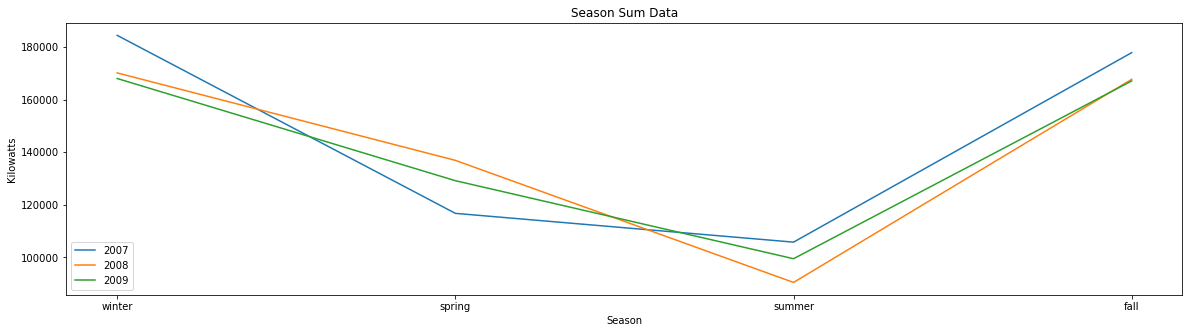

In [183]:
season_df = df[['Global_active_power', 'Global_reactive_power']]
season_df = season_df.resample('QS').sum()
season_df['season'] = pd.cut(season_df.index.month, [0,3,6,9,12], labels=['winter','spring','summer','fall'], right=False)

season_df = season_df.groupby(season_df.index.year)

for name, group in season_df:
    plt.plot(group['season'], group['Global_active_power'])
    plt.xlabel('Season')
    plt.ylabel('Kilowatts')
    plt.title('Season Sum Data')
plt.legend(['2007','2008','2009'])
plt.show()

Como esperado, o gasto energético no verão é menor do que no inverno.

# Correlação

Existe uma correlação entre esses dados?

In [184]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.248071,-0.393865,0.998951,0.488649,0.443231,0.632907
Global_reactive_power,0.248071,1.000000,-0.117304,0.266710,0.135451,0.141621,0.079128
Voltage,-0.393865,-0.117304,1.000000,-0.405290,-0.194682,-0.170190,-0.268158
Global_intensity,0.998951,0.266710,-0.405290,1.000000,0.492554,0.449179,0.621289
Sub_metering_1,0.488649,0.135451,-0.194682,0.492554,1.000000,0.058771,0.107776
Sub_metering_2,0.443231,0.141621,-0.170190,0.449179,0.058771,1.000000,0.087868
Sub_metering_3,0.632907,0.079128,-0.268158,0.621289,0.107776,0.087868,1.000000


Da pra ver por essa matriz que a coluna Global_intesity (A) está muito correlacionada ao Global_active_power (kW).

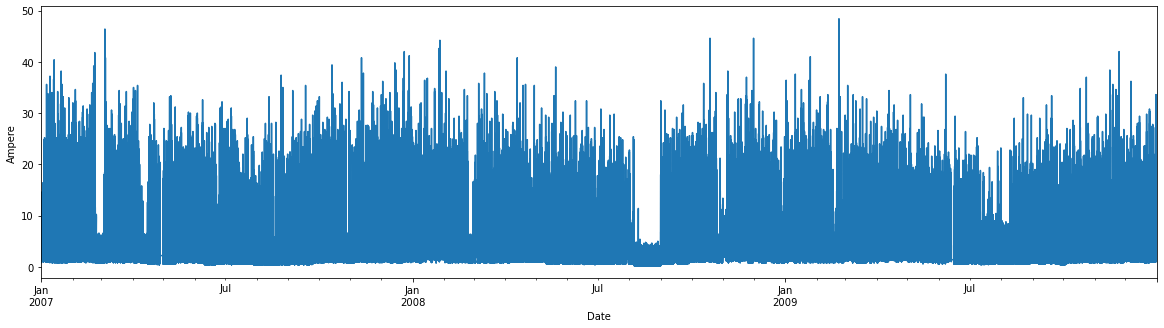

In [185]:
plt.ylabel('Ampere')
df['Global_intensity'].plot()
plt.show()

Essa relação não é dificil de entender já que a quantidade de corrente (ampere) na casa está diretamente ligada ao gasto energético (kilowatt).

Para criação do modelo eu nao utilizarei esse campo sendo a análise feito em cima de uma serie temporal univariavel.

# Outliers

Existe uma semana que os dados estão bem abaixos da média. Vamos buscar essa semana.

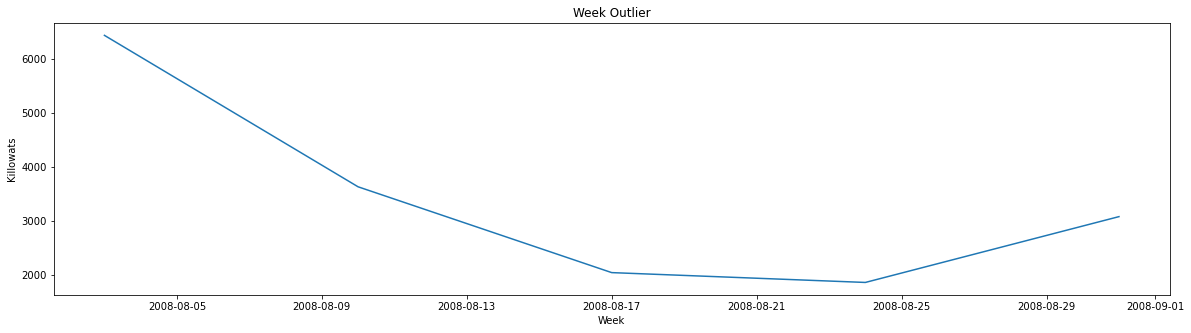

In [186]:
weekly_df = weekly_df.loc['2008-08-03':'2008-09-01']
plt.plot(weekly_df.index, weekly_df['Global_active_power'])
plt.xlabel('Week')
plt.ylabel('Killowats')
plt.title('Week Outlier')
plt.show()

Nesse grafico podemos ver que a semana 2008-08-17 ate a semana 2008-08-25 temos um outlier. 

## Hipótese
- Talvez a familia viajou de ferias?
       Já que só temos os dados, não podemos concluir nada, apenas supor.

# Feature engineering

Engenharia de features é importante no processo de modelagem dos problemas. É um processo que deixa os algoritmos de aprendizado de maquinas mais precisos.

In [1]:
# general
import pandas as pd
import numpy as np

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 5]

# settings
color_pal = sns.color_palette()

def join_date_and_time(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
    df = df.drop(['Time'], axis=1)
    return df

def clean(df):
    df = df.copy()
    for col in df.columns:
        #df = df[~df[col].str.contains('?', regex=False)]
        df[col] = df[col].str.replace('?', 'nan', regex=False).astype(float)
        df = df.fillna(method='ffill')
    return df

In [2]:
def create_time_series_features(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [3]:
FILE_PATH = 'data/household_power_consumption.txt'

df = pd.read_csv(FILE_PATH, delimiter=';', dtype=str)
df = join_date_and_time(df)
df = df.set_index('Date')
df = clean(df)
df['Sub_metering_4'] = (df['Global_active_power'] * 1000 / 60) - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Date,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


## Data scaling

Como sabemos, a maioria dos algoritmos de ML funcionando calculando alguma distancia entre os dados. Se as features estiverem pertos uma da outra, há uma boa chance do algoritmo poder ser treinado mais rapido. Dados com uma distancia maior requerem mais tempo de treinamento e com isso a acurácia tambem pode cair. [1]

Como podemos ver nos gráficos de cima, os dados estão com valores dispersos. Vamos utilizar RobustScaler que aplica basicamente normalização seguido de padronização nos dados.

In [4]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df)

In [5]:
processed_features = transformer.transform(df)
processed_features = pd.DataFrame(processed_features, columns=df.columns)

In [6]:
df = processed_features.set_index(df.index)

In [7]:
hourly_resampled_df = create_time_series_features(df.resample('H').mean())
daily_resampled_df = create_time_series_features(df.resample('D').mean())

In [8]:
column = 'Global_active_power'

hourly_shifted_df = hourly_resampled_df.copy()
daily_shifted_df = daily_resampled_df.copy()

hourly_shifted_df[column] = hourly_shifted_df[column].shift(-1)
daily_shifted_df[column] = daily_shifted_df[column].shift(-1)

In [9]:
hourly_shifted_df.loc[hourly_shifted_df.index[-1], 'Global_active_power'] = 0.0
daily_shifted_df.loc[daily_shifted_df.index[-1], 'Global_active_power'] = 0.0

In [10]:
daily_shifted_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,hour,dayofweek,quarter,month,year,dayofyear
Date,,,,,,,,,,,,,,
2006-12-16,1.444479,-0.080912,-1.234170,2.096566,0.000000,1.378788,0.672906,4.783798,0,5,4,12,2006,350
2006-12-17,0.766805,0.390059,-0.241078,1.479806,1.411806,2.907639,0.486152,3.054153,0,6,4,12,2006,351
2006-12-18,0.459769,0.084627,0.054701,0.764333,0.738194,1.820139,0.513807,1.168817,0,0,4,12,2006,352
2006-12-19,0.779324,0.033019,0.253052,0.465278,0.582639,5.279167,0.194322,0.548390,0,1,4,12,2006,353
2006-12-20,0.488848,0.080850,0.332833,0.773472,0.000000,1.838889,0.515645,1.311532,0,2,4,12,2006,354


# Modelo

# Refêrencias

[1] Bezzar, Nour El-Houda, Laimeche, Lakhdar, Meraoumia, Abdallah and Houam, Lotfi. \"Data analysis-based time series forecast for managing household electricity consumption\" Demonstratio Mathematica, vol. 55, no. 1, 2022, pp. 900-921. https://doi.org/10.1515/dema-2022-0176

[2] Neo Wu, Bradley Green, Xue Ben, Shawn O'Banion. \"Deep Transformer Models for Time Series Forecasting: The Influenza Prevalence Case\" https://arxiv.org/abs/2001.08317

[3] M. Sajjad, Z. A. Khan, A. Ullah, T. Hussain, W. Ullah, M. Y. Lee, et al., A novel CNN-GRU-based hybrid approach for short-term residential load forecasting, IEEE Access, 8 (2020), 143759–143768, https://doi.org/10.1109/ACCESS.2020.3009537.

[4] Z. A. Khan, T. Hussain, A. Ullah, S. Rho, M. Lee, and S. W. Baik, Towards efficient electricity forecasting in residential and commercial buildings: A novel hybrid CNN with a LSTM-AE based framework, Sensors, 20 (2020), no. 5, 1399, 1–16, https://doi.org/10.3390/s20051399.

[5] V. Puspita and Ermatita, Time series forecasting for electricity consumption using kernel principal component analysis (KPCA) and support vector machine (SVM), J. Phys. Conf. Series 1196 (2019), no. 012073, 1–8, https://doi.org/10.1088/1742-6596/1196/1/012073.